**PREPROCESSING**

* Data preprocessing is the process of generating raw data for machine learning models. This is the first step in creating a machine-learning model. This is the most complex and time-consuming aspect of data science. Data preprocessing is required in machine learning algorithms to reduce its complexities.




* Examples of methods used in data preprocessing include cleaning, instance selection, normalization, one-hot encoding, data transformation, feature extraction and feature selection.

>**IMPORT PYTHON LIBRARIES**



In [1464]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

>**1.Load the dataset in Python environment**



In [1465]:
data = pd.read_csv('/content/test_loan.csv')

::The head() method returns the first 5 rows if a number is not specified.

In [1466]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


::While analyzing the real datasets which are often very huge in size, we might need to get the column names in order to perform some certain operations.:

In [1467]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

::The info() method prints information about the DataFrame. The information contains the number of columns, column labels, column data types, memory usage, range index, and the number of cells in each column

In [1468]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


::The info() method prints information about the DataFrame. The information contains the number of columns, column labels, column data types, memory usage, range index, and the number of cells in each column

In [1469]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [1470]:
data.shape

(367, 12)

**2. Perform different preprocessing steps**

**a.Missing value handling**

::Missing data is defined as the values or data that is not stored (or not present) for some variable/s in the given dataset

In [1471]:
data.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [1472]:
data.isna().sum()/len(data)*100

Loan_ID              0.000000
Gender               2.997275
Married              0.000000
Dependents           2.724796
Education            0.000000
Self_Employed        6.267030
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           1.362398
Loan_Amount_Term     1.634877
Credit_History       7.901907
Property_Area        0.000000
dtype: float64

In [1473]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [1474]:
data['Gender'].unique()


array(['Male', 'Female', nan], dtype=object)

In [1475]:
data['Gender'].mode(0)

0    Male
Name: Gender, dtype: object

In [1476]:
data['Gender'] = data['Gender'].fillna(data['Gender'].mode()[0])

In [1477]:
data['Gender'].value_counts()

Male      297
Female     70
Name: Gender, dtype: int64

In [1478]:
data['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [1479]:
data['Dependents'].mode(0)

0    0
Name: Dependents, dtype: object

In [1480]:
data['Dependents'] = data['Dependents'].fillna(data['Dependents'].mode()[0])

In [1481]:
data['Dependents'].value_counts()

0     210
2      59
1      58
3+     40
Name: Dependents, dtype: int64

In [1482]:
data['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

In [1483]:
data['Self_Employed'].mode(0)

0    No
Name: Self_Employed, dtype: object

In [1484]:
data['Self_Employed'] = data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])

In [1485]:
data['Self_Employed'].value_counts()

No     330
Yes     37
Name: Self_Employed, dtype: int64

In [1486]:
data['Credit_History'].unique()

array([ 1., nan,  0.])

In [1487]:
data['Credit_History'].mode(0)

0    1.0
Name: Credit_History, dtype: float64

In [1488]:
data['Credit_History'] = data['Credit_History'].fillna(data['Credit_History'].mode()[0])

In [1489]:
data['Credit_History'].value_counts()

1.0    308
0.0     59
Name: Credit_History, dtype: int64

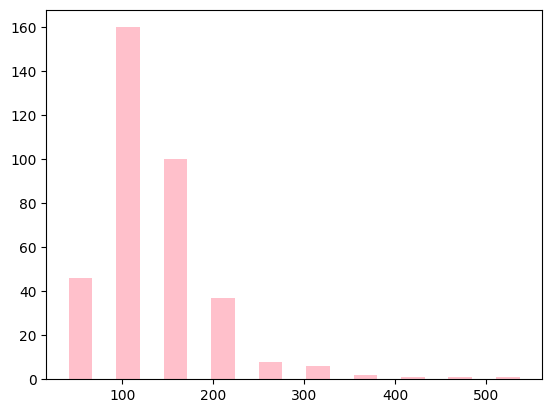

In [1490]:
plt.hist(data['LoanAmount'],rwidth=0.5,color="pink")
plt.show()

In [1491]:
data['LoanAmount'] = data['LoanAmount'].fillna(data['LoanAmount'].median())

In [1492]:
data['Loan_Amount_Term'].unique()

array([360., 240., 180.,  nan,  60., 480.,  84.,  12., 300., 350.,  36.,
       120.,   6.])

In [1493]:
data['Loan_Amount_Term'].mode(0)

0    360.0
Name: Loan_Amount_Term, dtype: float64

In [1494]:
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0])

In [1495]:
data['Loan_Amount_Term'].value_counts()

360.0    317
180.0     22
480.0      8
300.0      7
240.0      4
84.0       3
60.0       1
12.0       1
350.0      1
36.0       1
120.0      1
6.0        1
Name: Loan_Amount_Term, dtype: int64

In [1496]:
data.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

**b. Outlier detection**

::An outlier is a data point significantly different from other data points in a dataset. Outliers can occur for various reasons, such as measurement errors, data entry errors, or natural variations in the data.

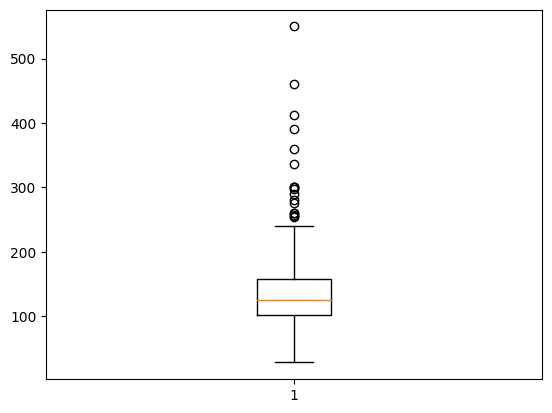

In [1497]:
plt.boxplot(data['LoanAmount'])
plt.show()

In [1498]:
q1 = data['LoanAmount'].quantile(0.25)
q2 = data['LoanAmount'].quantile(0.5)
q3 = data['LoanAmount'].quantile(0.75)


In [1499]:
iqr = q3 -q1

In [1500]:
up_lim = q3+(1.5*iqr)
low_lim = q1-(1.5*iqr)

In [1501]:
print(up_lim,low_lim)

242.25 16.25


In [1502]:
data[(data['LoanAmount']>up_lim) | (data['LoanAmount']<low_lim)].index

Int64Index([8, 18, 24, 27, 81, 83, 91, 96, 124, 143, 144, 189, 194, 284, 285,
            331, 345, 350],
           dtype='int64')

In [1503]:
data.drop([8, 18, 24, 27, 81, 83, 91, 96, 124, 143, 144, 189, 194, 284, 285,
            331, 345, 350],inplace = True)

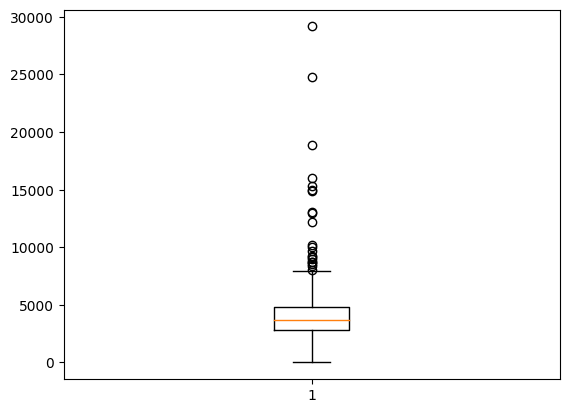

In [1504]:
plt.boxplot(data['ApplicantIncome'])
plt.show()

In [1505]:
q1 = data['ApplicantIncome'].quantile(0.25)
q2 = data['ApplicantIncome'].quantile(0.5)
q3 = data['ApplicantIncome'].quantile(0.75)

In [1506]:
iqr = q3 -q1

In [1507]:
up_lim = q3+(1.5*iqr)
low_lim = q1-(1.5*iqr)

In [1508]:
print(up_lim,low_lim)

7963.0 -325.0


In [1509]:
data[(data['ApplicantIncome']>up_lim) | (data['ApplicantIncome']<low_lim)].index

Int64Index([ 13,  49,  98, 145, 147, 179, 184, 187, 188, 200, 230, 247, 263,
            272, 279, 283, 289, 302, 323, 360, 366],
           dtype='int64')

In [1510]:
data.drop([ 13,  49,  98, 145, 147, 179, 184, 187, 188, 200, 230, 247, 263,
            272, 279, 283, 289, 302, 323, 360, 366],inplace = True)

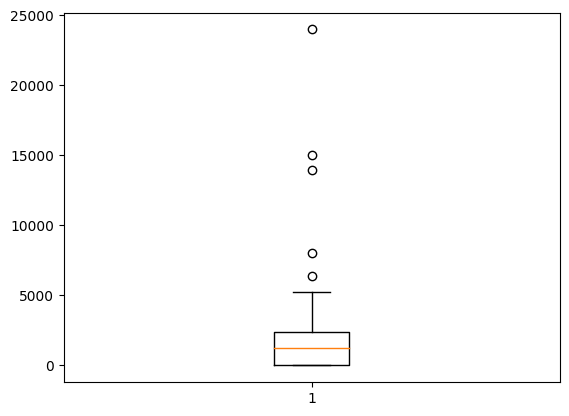

In [1511]:
plt.boxplot(data['CoapplicantIncome'])
plt.show()

In [1512]:
q1 = data['CoapplicantIncome'].quantile(0.25)
q2 = data['CoapplicantIncome'].quantile(0.5)
q3 = data['CoapplicantIncome'].quantile(0.75)

In [1513]:
iqr = q3 -q1

In [1514]:
up_lim = q3+(1.5*iqr)
low_lim = q1-(1.5*iqr)

In [1515]:
print(up_lim,low_lim)

6040.625 -3624.375


In [1516]:
data[(data['CoapplicantIncome']>up_lim) | (data['CoapplicantIncome']<low_lim)].index

Int64Index([25, 85, 123, 237, 351], dtype='int64')

In [1517]:
data.drop([25, 85, 123, 237, 351],inplace = True)

In [1518]:
data.shape

(323, 12)

**c. Encoding**

::Target encoding is a technique used in machine learning and data preprocessing to transform categorical variables into numerical values.

**Mapping ordinal values**

In [1519]:
data['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [1520]:
dict1 = {'Male':1,'Female':2}

In [1521]:
data['Gender']= data['Gender'].map(dict1)

In [1522]:
data['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [1523]:
dict1 = {'Graduate':1,'Not Graduate':2}

In [1524]:
data['Education']= data['Education'].map(dict1)

In [1525]:
data['Property_Area'].unique()

array(['Urban', 'Semiurban', 'Rural'], dtype=object)

In [1526]:
dict1 = {'Urban':1,'Semiurban':2,'Rural':3}

In [1527]:
data['Property_Area']= data['Property_Area'].map(dict1)

In [1528]:
data['Dependents'] = data['Dependents'].str.strip('+')

In [1529]:
data['Dependents'] = data['Dependents'].astype('int32')

In [1530]:
data['Self_Employed'].unique()

array(['No', 'Yes'], dtype=object)

In [1531]:
x=data.drop('Self_Employed',axis=1)

In [1532]:
y = ['Self_Employed']

In [1533]:
x['Married'].unique()

array(['Yes', 'No'], dtype=object)

In [1534]:
from sklearn.preprocessing import LabelEncoder

In [1535]:
le = LabelEncoder()

In [1536]:
x['Married'] = le.fit_transform(x['Married'])

In [1537]:
x.head()

,Loan_ID,Gender,Married,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,1,1,0,1,5720,0,110.0,360.0,1.0,1
1,LP001022,1,1,1,1,3076,1500,126.0,360.0,1.0,1
2,LP001031,1,1,2,1,5000,1800,208.0,360.0,1.0,1
3,LP001035,1,1,2,1,2340,2546,100.0,360.0,1.0,1
4,LP001051,1,0,0,2,3276,0,78.0,360.0,1.0,1


**one-hot encoding**

In [1538]:
x = pd.get_dummies(x)

In [1539]:
x.head()

,Gender,Married,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,...,Loan_ID_LP002932,Loan_ID_LP002935,Loan_ID_LP002952,Loan_ID_LP002954,Loan_ID_LP002962,Loan_ID_LP002969,Loan_ID_LP002971,Loan_ID_LP002975,Loan_ID_LP002980,Loan_ID_LP002986
0,1,1,0,1,5720,0,110.0,360.0,1.0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,3076,1500,126.0,360.0,1.0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,2,1,5000,1800,208.0,360.0,1.0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,2,1,2340,2546,100.0,360.0,1.0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,2,3276,0,78.0,360.0,1.0,1,...,0,0,0,0,0,0,0,0,0,0


In [1540]:
x.shape

(323, 333)

**Target column encoding**

In [1541]:
y = le.fit_transform(y)

**d. Scaling**

::Feature scaling is a method used to normalize the range of independent variables or features of data. In data processing, it is also known as data normalization

In [1542]:
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()

In [1543]:
x.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Property_Area',
       ...
       'Loan_ID_LP002932', 'Loan_ID_LP002935', 'Loan_ID_LP002952',
       'Loan_ID_LP002954', 'Loan_ID_LP002962', 'Loan_ID_LP002969',
       'Loan_ID_LP002971', 'Loan_ID_LP002975', 'Loan_ID_LP002980',
       'Loan_ID_LP002986'],
      dtype='object', length=333)

In [1544]:
x.loc[:,['Gender', 'Married', 'Dependents', 'Education', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Property_Area'],] = min_max.fit_transform(x[['Gender', 'Married', 'Dependents', 'Education', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Property_Area']])

<ipython-input-1544-9b66396cac18>:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  x.loc[:,['Gender', 'Married', 'Dependents', 'Education', 'ApplicantIncome',


In [1545]:
x.head()

,Gender,Married,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,...,Loan_ID_LP002932,Loan_ID_LP002935,Loan_ID_LP002952,Loan_ID_LP002954,Loan_ID_LP002962,Loan_ID_LP002969,Loan_ID_LP002971,Loan_ID_LP002975,Loan_ID_LP002980,Loan_ID_LP002986
0,0.0,1.0,0.000000,0.0,0.719497,0.000000,0.401961,0.746835,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,1.0,0.333333,0.0,0.386918,0.284522,0.480392,0.746835,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,0.0,1.0,0.666667,0.0,0.628931,0.341426,0.882353,0.746835,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,0.0,1.0,0.666667,0.0,0.294340,0.482929,0.352941,0.746835,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,0.0,0.000000,1.0,0.412075,0.000000,0.245098,0.746835,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [1546]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**1.Load the dataset in Python environment**

In [1547]:
data = pd.read_csv('/content/train_loan.csv')

In [1548]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [1549]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [1550]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [1551]:
data.shape

(614, 13)

**2. Perform different preprocessing steps**

**a.Missing value handling**

In [1552]:
data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [1553]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [1554]:
data['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [1555]:
data['Gender'].mode(0)

0    Male
Name: Gender, dtype: object

In [1556]:
data['Gender'] = data['Gender'].fillna(data['Gender'].mode()[0])

In [1557]:
data['Gender'].value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

In [1558]:
data['Married'].unique()

array(['No', 'Yes', nan], dtype=object)

In [1559]:
data['Married'].mode(0)

0    Yes
Name: Married, dtype: object

In [1560]:
data['Married'] = data['Gender'].fillna(data['Gender'].mode()[0])

In [1561]:
data['Married'].value_counts()

Male      502
Female    112
Name: Married, dtype: int64

In [1562]:
data['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [1563]:
data['Dependents'].mode(0)

0    0
Name: Dependents, dtype: object

In [1564]:
data['Dependents'] = data['Dependents'].fillna(data['Dependents'].mode()[0])

In [1565]:
data['Dependents'].value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [1566]:
data['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

In [1567]:
data['Self_Employed'].mode(0)

0    No
Name: Self_Employed, dtype: object

In [1568]:
data['Self_Employed'] = data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])

In [1569]:
data['Self_Employed'].value_counts()

No     532
Yes     82
Name: Self_Employed, dtype: int64

In [1570]:
data['Credit_History'].unique()

array([ 1.,  0., nan])

In [1571]:
data['Credit_History'] = data['Credit_History'].fillna(data['Credit_History'].mode()[0])

In [1572]:
data['Credit_History'].mode(0)

0    1.0
Name: Credit_History, dtype: float64

In [1573]:
data['Credit_History'].value_counts()

1.0    525
0.0     89
Name: Credit_History, dtype: int64

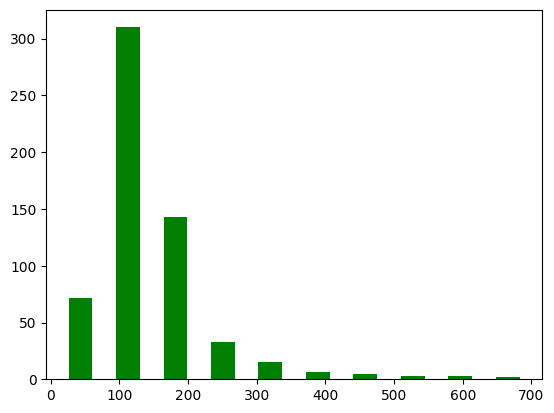

In [1574]:
plt.hist(data['LoanAmount'],rwidth=0.5,color="green")
plt.show()

In [1575]:
data['LoanAmount'] = data['LoanAmount'].fillna(data['LoanAmount'].median())

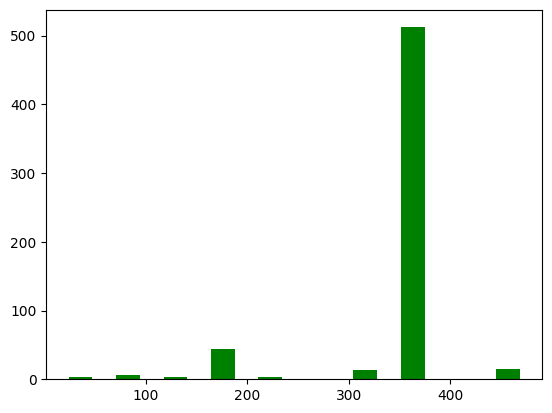

In [1576]:
plt.hist(data['Loan_Amount_Term'],rwidth=0.5,color="green")
plt.show()

In [1577]:
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].median())

In [1578]:
data.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

**b. Outlier detection**

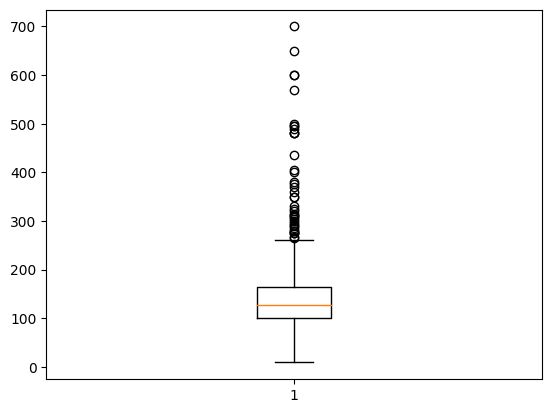

In [1579]:
plt.boxplot(data['LoanAmount'])
plt.show()

In [1580]:
q1 = data['LoanAmount'].quantile(0.25)
q2 = data['LoanAmount'].quantile(0.5)
q3 = data['LoanAmount'].quantile(0.75)

In [1581]:
iqr = q3 -q1

In [1582]:
up_lim = q3+(1.5*iqr)
low_lim = q1-(1.5*iqr)

In [1583]:
print(up_lim,low_lim)

261.5 3.5


In [1584]:
data[(data['LoanAmount']>up_lim) | (data['LoanAmount']<low_lim)].index

Int64Index([  5,   9,  21,  34,  54,  67,  83, 126, 130, 135, 155, 161, 171,
            177, 233, 253, 258, 260, 278, 308, 324, 325, 333, 351, 369, 372,
            381, 391, 409, 432, 487, 506, 514, 523, 525, 536, 561, 572, 592,
            600, 604],
           dtype='int64')

In [1585]:
data.drop([  5,   9,  21,  34,  54,  67,  83, 126, 130, 135, 155, 161, 171,
            177, 233, 253, 258, 260, 278, 308, 324, 325, 333, 351, 369, 372,
            381, 391, 409, 432, 487, 506, 514, 523, 525, 536, 561, 572, 592,
            600, 604],inplace = True)

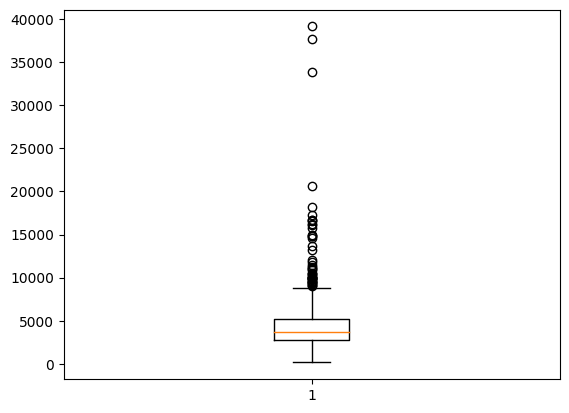

In [1586]:
plt.boxplot(data['ApplicantIncome'])
plt.show()

In [1587]:
q1 = data['ApplicantIncome'].quantile(0.25)
q2 = data['ApplicantIncome'].quantile(0.5)
q3 = data['ApplicantIncome'].quantile(0.75)

In [1588]:
iqr = q3 -q1

In [1589]:
up_lim = q3+(1.5*iqr)
low_lim = q1-(1.5*iqr)

In [1590]:
print(up_lim,low_lim)

8971.5 -952.5


In [1591]:
data[(data['ApplicantIncome']>up_lim) | (data['ApplicantIncome']<low_lim)].index

Int64Index([ 25, 102, 106, 115, 119, 128, 138, 144, 146, 148, 152, 157, 164,
            183, 185, 189, 191, 199, 210, 246, 254, 271, 284, 289, 319, 334,
            350, 370, 390, 424, 435, 438, 443, 467, 475, 478, 483, 493, 509,
            533, 534, 557, 594, 598],
           dtype='int64')

In [1592]:
data.drop([ 25, 102, 106, 115, 119, 128, 138, 144, 146, 148, 152, 157, 164,
            183, 185, 189, 191, 199, 210, 246, 254, 271, 284, 289, 319, 334,
            350, 370, 390, 424, 435, 438, 443, 467, 475, 478, 483, 493, 509,
            533, 534, 557, 594, 598],inplace = True)

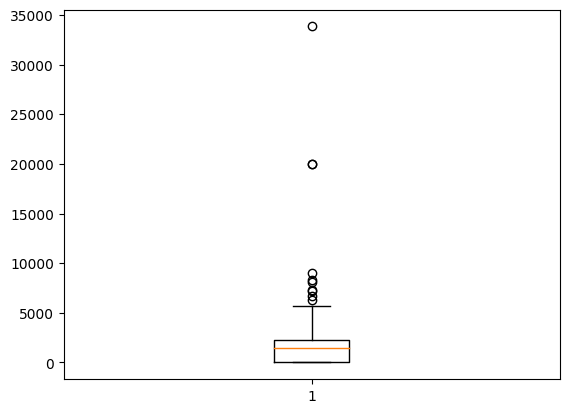

In [1593]:
plt.boxplot(data['CoapplicantIncome'])
plt.show()

In [1594]:
q1 = data['ApplicantIncome'].quantile(0.25)
q2 = data['ApplicantIncome'].quantile(0.5)
q3 = data['ApplicantIncome'].quantile(0.75)

In [1595]:
iqr = q3 -q1

In [1596]:
up_lim = q3+(1.5*iqr)
low_lim = q1-(1.5*iqr)

In [1597]:
print(up_lim,low_lim)

7723.0 -317.0


In [1598]:
data[(data['ApplicantIncome']>up_lim) | (data['ApplicantIncome']<low_lim)].index

Int64Index([58, 88, 169, 196, 212, 356, 376, 408, 430, 441, 459, 461, 484, 564,
            611],
           dtype='int64')

In [1599]:
data.drop([58, 88, 169, 196, 212, 356, 376, 408, 430, 441, 459, 461, 484, 564,
            611],inplace = True)

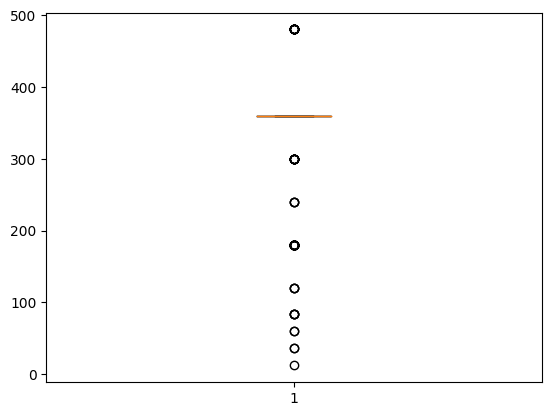

In [1600]:
plt.boxplot(data['Loan_Amount_Term'])
plt.show()

In [1601]:
q1 = data['Loan_Amount_Term'].quantile(0.25)
q2 = data['Loan_Amount_Term'].quantile(0.5)
q3 = data['Loan_Amount_Term'].quantile(0.75)

In [1602]:
iqr = q3 -q1

In [1603]:
up_lim = q3+(1.5*iqr)
low_lim = q1-(1.5*iqr)

In [1604]:
print(up_lim,low_lim)

360.0 360.0


In [1605]:
data[(data['Loan_Amount_Term']>up_lim) | (data['Loan_Amount_Term']<low_lim)].index

Int64Index([ 14,  16,  62,  66,  68,  72,  75,  78,  84,  91,  94,  98, 100,
            109, 133, 142, 168, 172, 179, 182, 186, 202, 228, 231, 241, 242,
            245, 247, 248, 262, 282, 286, 293, 298, 313, 315, 355, 358, 363,
            366, 373, 375, 378, 385, 393, 400, 401, 429, 444, 451, 453, 466,
            471, 476, 495, 497, 500, 504, 513, 516, 539, 540, 546, 554, 573,
            575, 585, 590, 591, 593, 605, 610],
           dtype='int64')

In [1606]:
data.drop([ 14,  16,  62,  66,  68,  72,  75,  78,  84,  91,  94,  98, 100,
            109, 133, 142, 168, 172, 179, 182, 186, 202, 228, 231, 241, 242,
            245, 247, 248, 262, 282, 286, 293, 298, 313, 315, 355, 358, 363,
            366, 373, 375, 378, 385, 393, 400, 401, 429, 444, 451, 453, 466,
            471, 476, 495, 497, 500, 504, 513, 516, 539, 540, 546, 554, 573,
            575, 585, 590, 591, 593, 605, 610],inplace = True)

In [1607]:
data.shape

(442, 13)

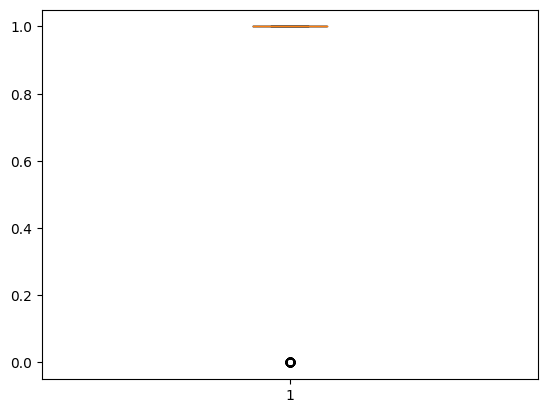

In [1608]:
plt.boxplot(data['Credit_History'])
plt.show()

In [1609]:
q1 = data['Credit_History'].quantile(0.25)
q2 = data['Credit_History'].quantile(0.5)
q3 = data['Credit_History'].quantile(0.75)

In [1610]:
iqr = q3 -q1

In [1611]:
up_lim = q3+(1.5*iqr)
low_lim = q1-(1.5*iqr)

In [1612]:
print(up_lim,low_lim)

1.0 1.0


In [1613]:
data[(data['Credit_History']>up_lim) | (data['Credit_History']<low_lim)].index

Int64Index([  7,  17,  20,  22,  23,  36,  48,  63,  64,  69,  73, 108, 112,
            122, 150, 162, 180, 201, 211, 218, 220, 250, 256, 267, 280, 291,
            300, 307, 326, 338, 346, 353, 367, 387, 396, 399, 412, 414, 421,
            423, 431, 448, 450, 452, 464, 477, 486, 494, 499, 517, 527, 532,
            541, 548, 550, 553, 567, 569, 571, 576, 584, 589, 597, 613],
           dtype='int64')

In [1614]:
data.drop([  7,  17,  20,  22,  23,  36,  48,  63,  64,  69,  73, 108, 112,
            122, 150, 162, 180, 201, 211, 218, 220, 250, 256, 267, 280, 291,
            300, 307, 326, 338, 346, 353, 367, 387, 396, 399, 412, 414, 421,
            423, 431, 448, 450, 452, 464, 477, 486, 494, 499, 517, 527, 532,
            541, 548, 550, 553, 567, 569, 571, 576, 584, 589, 597, 613],inplace = True)

In [1615]:
data.shape

(378, 13)

**c. Encoding**

In [1616]:
data['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [1617]:
dict1 = {'Male':1,'Female':2}

In [1618]:
data['Gender']= data['Gender'].map(dict1)

In [1619]:
data['Married'].unique()

array(['Male', 'Female'], dtype=object)

In [1620]:
dict1 = {'Male':1,'Female':2}

In [1621]:
data['Married']= data['Married'].map(dict1)

In [1622]:
data['Dependents'].unique()

array(['0', '1', '2', '3+'], dtype=object)

In [1623]:
data['Dependents'] = data['Dependents'].str.strip('+')

In [1624]:
data['Dependents'] = data['Dependents'].astype('int32')

In [1625]:
data['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [1626]:
dict1 = {'Graduate':1, 'Not Graduate':2}

In [1627]:
data['Education']= data['Education'].map(dict1)

In [1628]:
data['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [1629]:
dict1 = {'Urban':1,'Rural':2,'Semiurban':3}

In [1630]:
data['Property_Area']= data['Property_Area'].map(dict1)

In [1631]:
data['Self_Employed'].unique()

array(['No', 'Yes'], dtype=object)

In [1632]:
x=data.drop('Self_Employed',axis=1)

In [1633]:
y = ['Self_Employed']

In [1634]:
x['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

In [1635]:
from sklearn.preprocessing import LabelEncoder

In [1636]:
le = LabelEncoder()

In [1637]:
x['Loan_Status'] = le.fit_transform(x['Loan_Status'])

In [1638]:
x = pd.get_dummies(x)

In [1639]:
x.head()

,Gender,Married,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,...,Loan_ID_LP002941,Loan_ID_LP002948,Loan_ID_LP002950,Loan_ID_LP002953,Loan_ID_LP002958,Loan_ID_LP002961,Loan_ID_LP002964,Loan_ID_LP002974,Loan_ID_LP002978,Loan_ID_LP002984
0,1,1,0,1,5849,0.0,128.0,360.0,1.0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,4583,1508.0,128.0,360.0,1.0,2,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,1,3000,0.0,66.0,360.0,1.0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,2,2583,2358.0,120.0,360.0,1.0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,1,6000,0.0,141.0,360.0,1.0,1,...,0,0,0,0,0,0,0,0,0,0


**scaling**

In [1640]:
from sklearn.preprocessing import MinMaxScaler

In [1641]:
x.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Property_Area',
       ...
       'Loan_ID_LP002941', 'Loan_ID_LP002948', 'Loan_ID_LP002950',
       'Loan_ID_LP002953', 'Loan_ID_LP002958', 'Loan_ID_LP002961',
       'Loan_ID_LP002964', 'Loan_ID_LP002974', 'Loan_ID_LP002978',
       'Loan_ID_LP002984'],
      dtype='object', length=389)

In [1642]:
x.loc[:,['Gender', 'Married', 'Dependents', 'Education', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Property_Area'],] = min_max.fit_transform(x[['Gender', 'Married', 'Dependents', 'Education', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Property_Area']])

<ipython-input-1642-9b66396cac18>:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  x.loc[:,['Gender', 'Married', 'Dependents', 'Education', 'ApplicantIncome',


In [1643]:
x.head()

,Gender,Married,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,...,Loan_ID_LP002941,Loan_ID_LP002948,Loan_ID_LP002950,Loan_ID_LP002953,Loan_ID_LP002958,Loan_ID_LP002961,Loan_ID_LP002964,Loan_ID_LP002974,Loan_ID_LP002978,Loan_ID_LP002984
0,0.0,0.0,0.000000,0.0,0.758148,0.000000,0.476,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,0.0,0.333333,0.0,0.589730,0.044567,0.476,0.0,0.0,0.5,...,0,0,0,0,0,0,0,0,0,0
2,0.0,0.0,0.000000,0.0,0.379141,0.000000,0.228,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,0.0,0.0,0.000000,1.0,0.323666,0.069687,0.444,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,0.0,0.000000,0.0,0.778236,0.000000,0.528,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
